# Test of code_bar

In [21]:
import pandas as pd
import numpy as np

try:
    from mutagenesis_visualization.main.scripts.code_create_objects import (
        hras_RBD,
        aph_obj,
    )
except ModuleNotFoundError:
    import import_notebook
    import os
    directory = os.getcwd()
    new_directory = directory.replace('tests', 'main')
    os.chdir(new_directory)

    from code_create_objects import (
        hras_RBD,
        aph_obj,
    )
    os.chdir(directory)

# Test bar graph with mean enrichment

In [24]:
def test_plot_mean():
    
    # Create dictionary with objects
    dict_obj = {
        'obj_test_1': hras_RBD(),
        'obj_test_2': aph_obj(),
    }

    # Define aux function
    def _test_plot_mean_output(obj_test, parameters):
        error = False
        try:
            obj_test.mean(
                **parameters
            )  # pass dictionary as arguments of method
        except:
            error = True
        return error

    # Define dictionary of parameters
    # Each dict in the list will be a different set of parameters
    list_params = [
        {
            'show': False,
        },
        {
            'figsize': (3, 2.5),
            'y_label': r'$∆E^i_x$',
            'show': False,
        },
    ]

    # Assert
    for obj_label, obj_test in dict_obj.items(): # Loop over the dictionary
        for parameters in list_params: # Loop over the parameters
            assert _test_plot_mean_output( # Assert that that set of parameters works on that object
                obj_test,
                parameters,
            ) == False, "plot_mean failed with {} object and {} parameters".format(
                obj_label,
                parameters,
            )

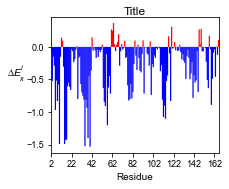

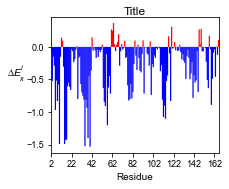

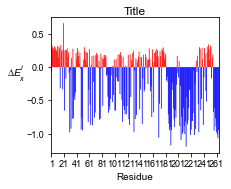

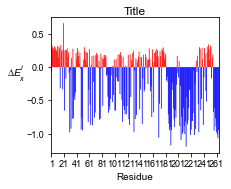

In [25]:
test_plot_mean()

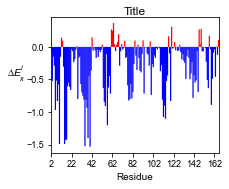

In [9]:
hras_RBD().mean()

In [8]:
help(hras_RBD().mean)

Help on method plot_mean in module code_bar:

plot_mean(mode='mean', show_cartoon=False, output_file: Union[NoneType, str, pathlib.Path] = None, **kwargs) method of code_class.Screen instance
    Plot in a bargraph the mean enrichment for each residue of the protein. 
    Red for gain of function, blue for loss of function
    
    Parameters
    ----------
    self : object from class *Screen*
    
    mode : str, default 'mean'
        Specify what enrichment scores to show. If mode = 'mean', it will show the mean of 
        each position. If mode = 'A', it will show the alanine substitution profile. Can be 
        used for each amino acid. Use the one-letter code and upper case.
    
    show_carton : boolean, default False
        If true, the plot will display a cartoon with the secondary structure. 
        The user must have added the secondary structure to the object. 
    
    output_file : str, default None
        If you want to export the generated graph, add the path and